<a href="https://colab.research.google.com/github/gabrielcarcedo/Taller-Pre-Congreso-CNIB-2025-ML-en-Datos-Medicos/blob/main/Notebooks/Taller_Pre_Congreso_ML_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning para Procesamiento de Datos Médicos**
---
## Taller Pre-Congreso CNIB 2025
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b> (<i>Universidad Modelo</i>): <a href= "mailto:CORREO">CORREO</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.unimodelo.edu.mx/merida">Universidad Modelo</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.unimodelo.edu.mx/merida">
        <img src="https://servicios.unimodelo.edu.mx/merida/ing/practicas/resources/imgs/logo-modelo.png" alt="Universidad Modelo" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>

</table>


# Paqueterías y Librerías 📦📚

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 📑: **Pima Indian diabetes**

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. Su objetivo es predecir si un paciente padece diabetes, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Todos los pacientes en la base de datos son mujeres de al menos 21 años de ascendencia indígena pima.

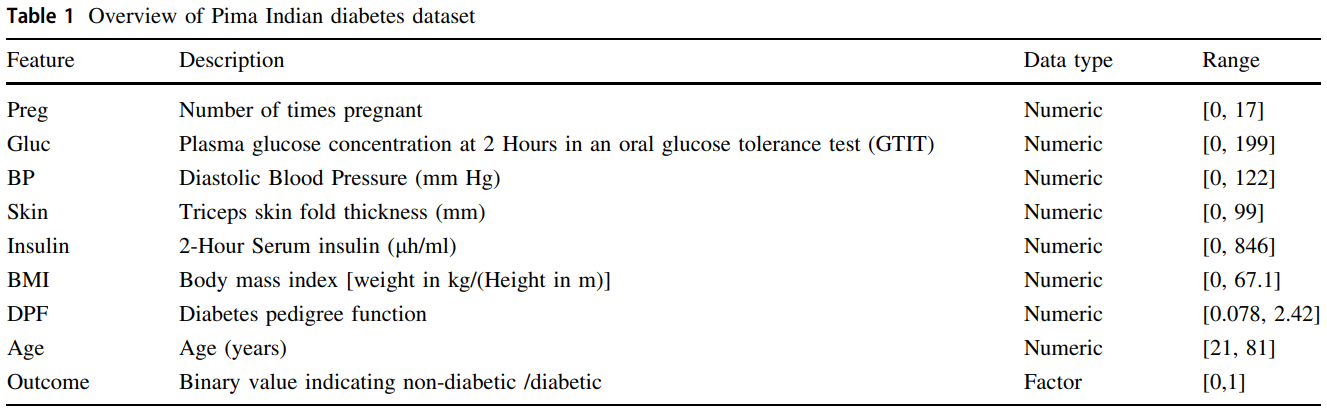

Imagen tomada de: _Larabi-Marie-Sainte, S.; Aburahmah, L.; Almohaini, R.; Saba, T. Current Techniques for Diabetes Prediction: Review and Case Study. Appl. Sci. 2019, 9, 4604._ https://doi.org/10.3390/app9214604

In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

dataset_path = "/kaggle/input/pima-indians-diabetes-database"
print(os.listdir(dataset_path))

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database
['diabetes.csv']


In [ ]:
diabetes_df = pd.read_csv(os.path.join(dataset_path, "diabetes.csv"))

diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Exploratory Data Analysis (EDA):**

In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Missing values:\n", diabetes_df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
diabetes_df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


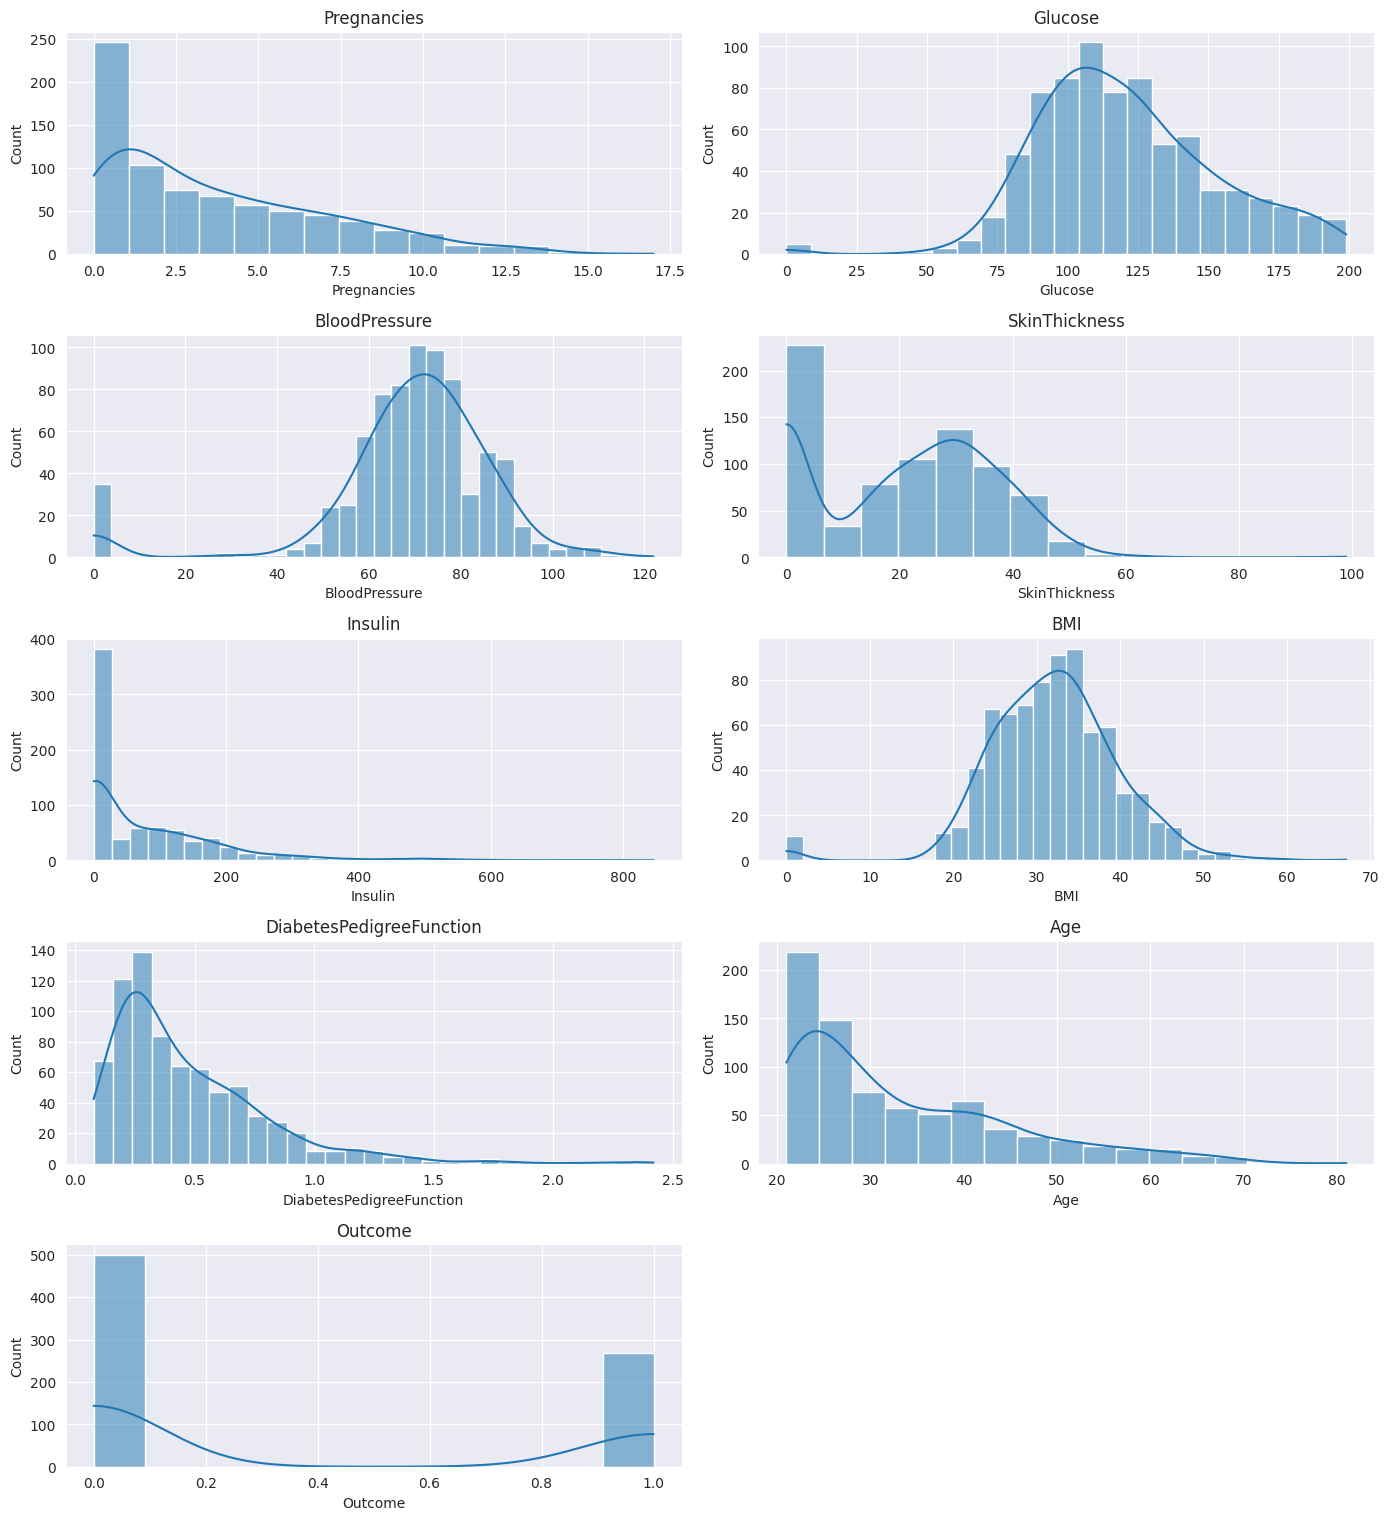

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(14, len(diabetes_df.columns) * 3))
for idx, feature in enumerate(diabetes_df.columns, 1):
    plt.subplot(len(diabetes_df.columns), 2, idx)
    sns.histplot(diabetes_df[feature], kde=True)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

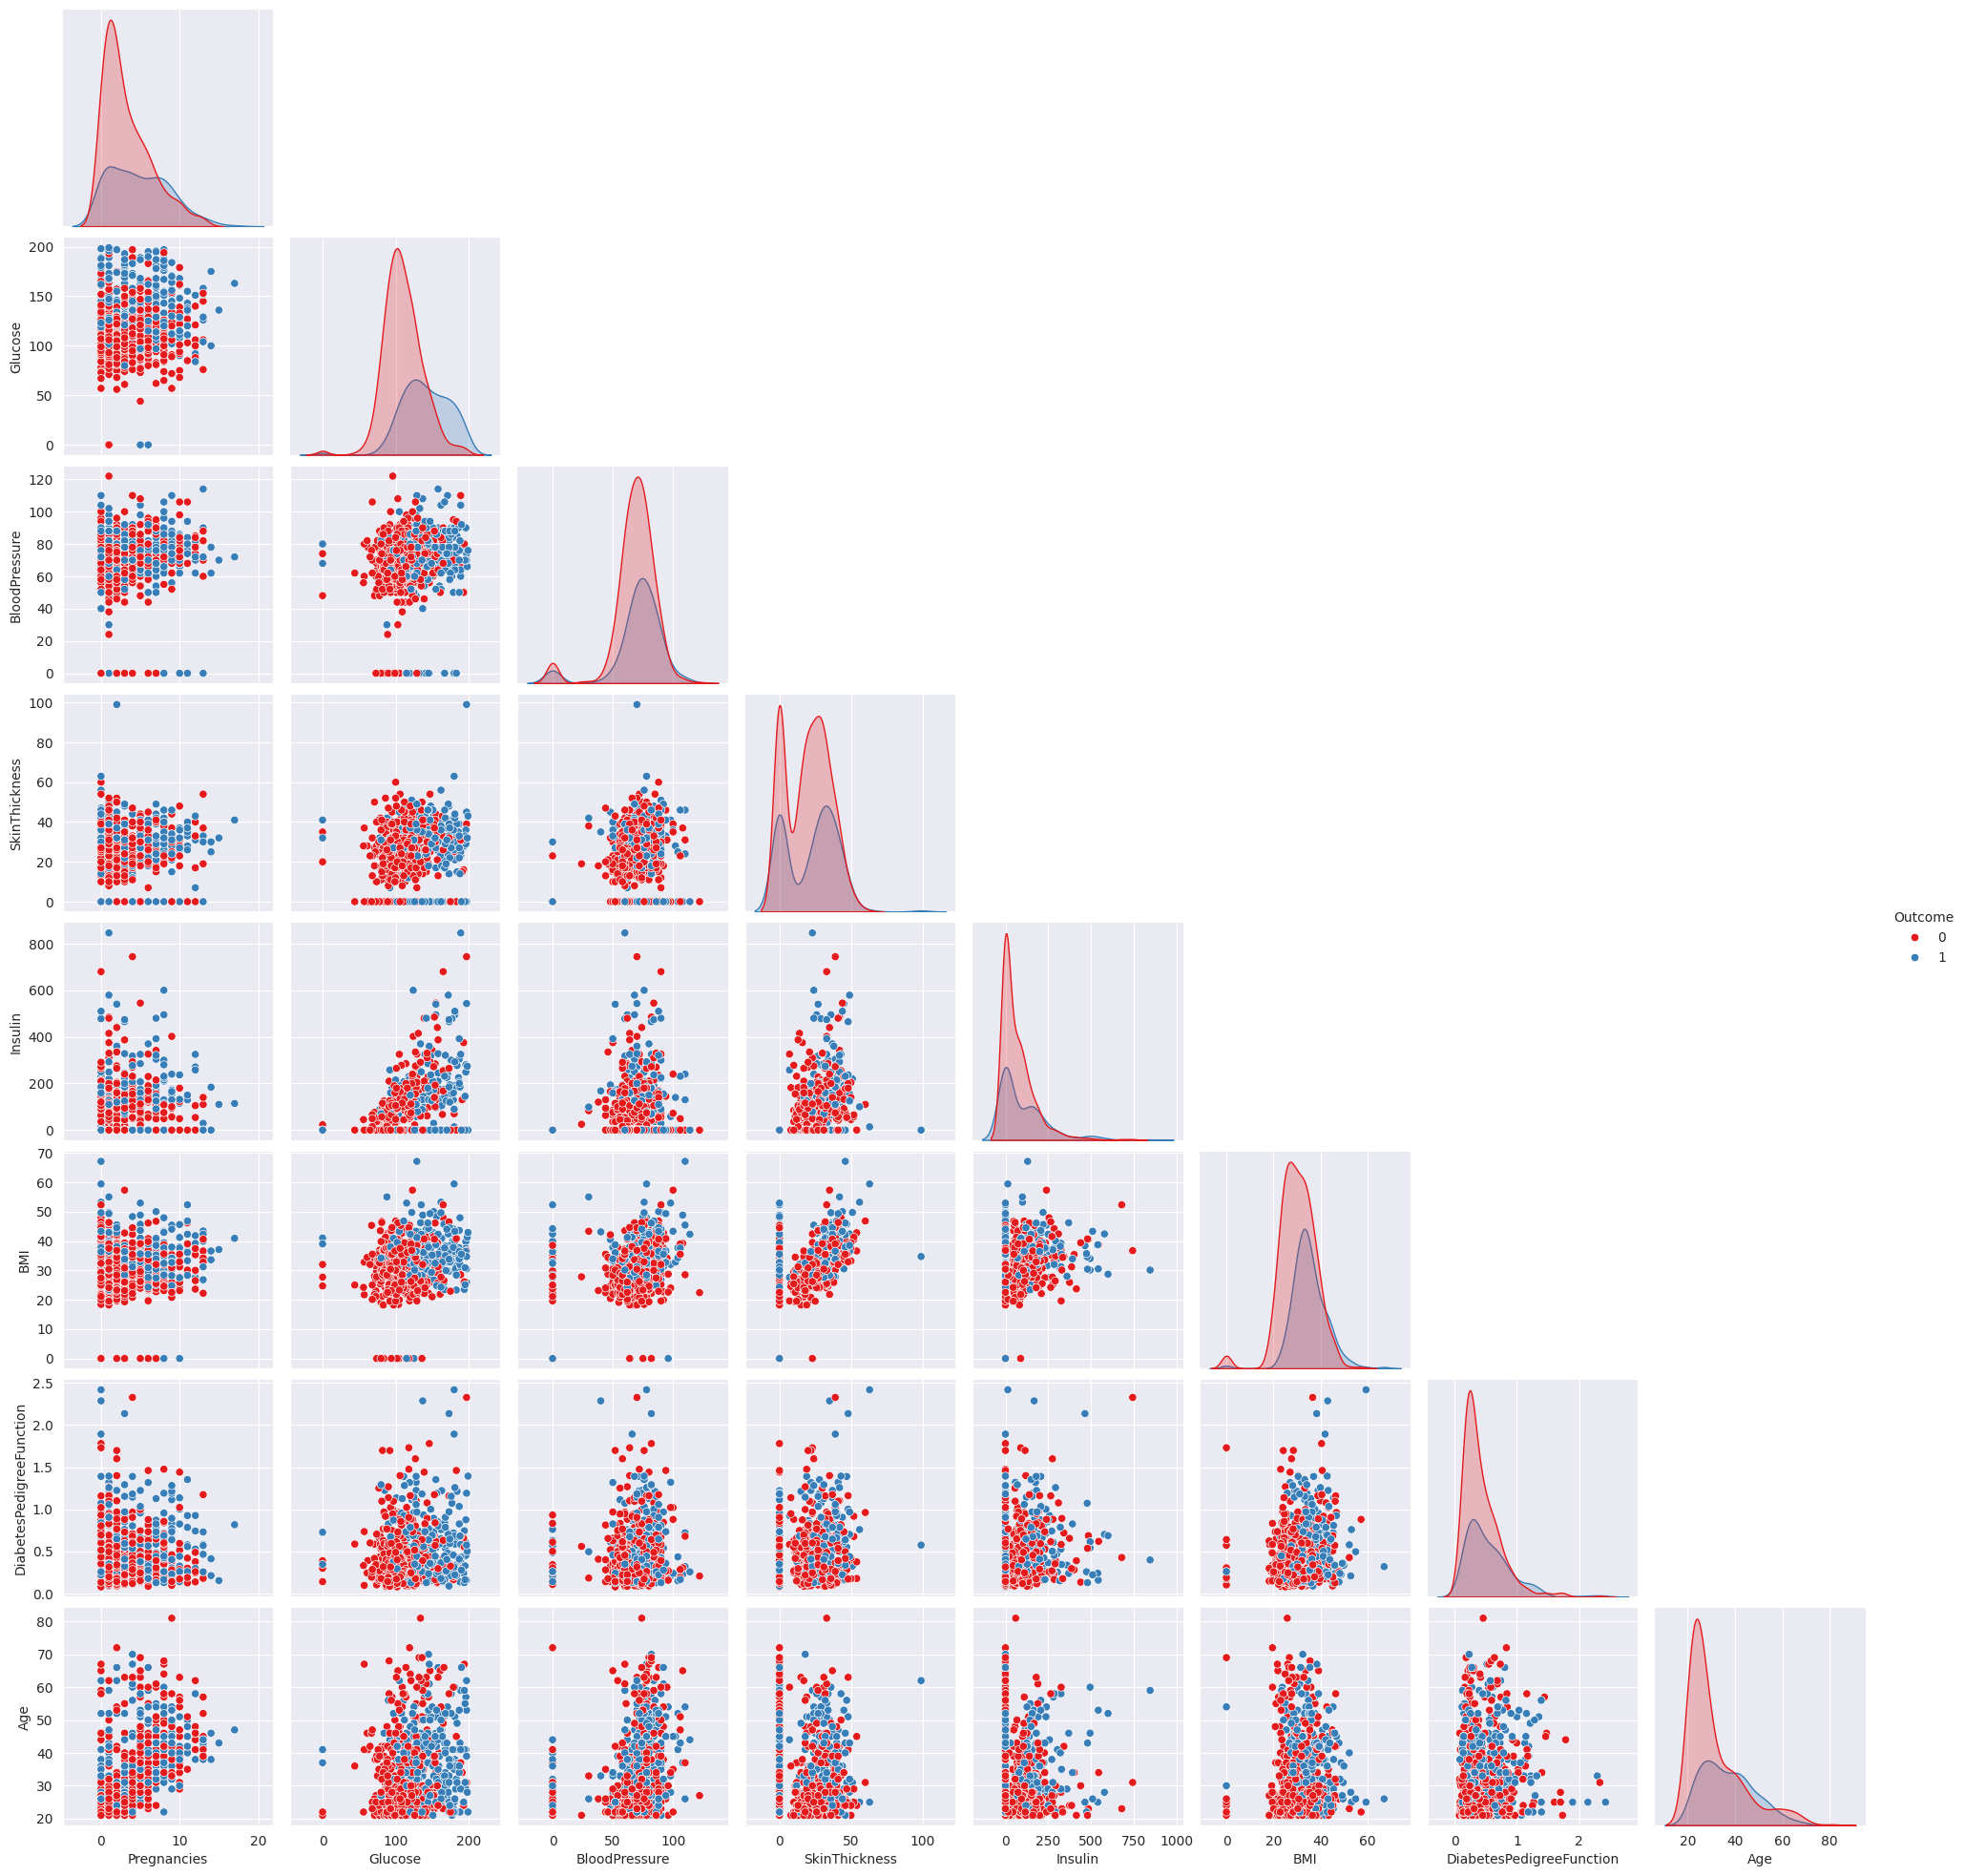

In [ ]:
# Pair Plot for Diabetes Dataset

plt.figure(figsize=(6, 6))

sns.pairplot(diabetes_df, hue="Outcome", palette="Set1", corner=True)

plt.show()

## Separation between features and target

In [ ]:
diabetes_df_X = diabetes_df.drop("Outcome", axis=1)
diabetes_df_y = diabetes_df["Outcome"]

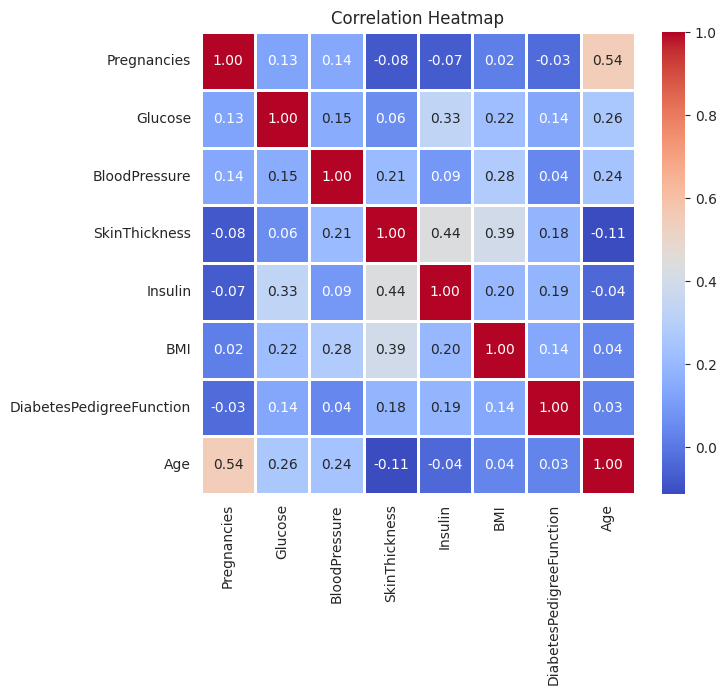

In [ ]:
plt.figure(figsize=(7, 6))

sns.heatmap(diabetes_df_X.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

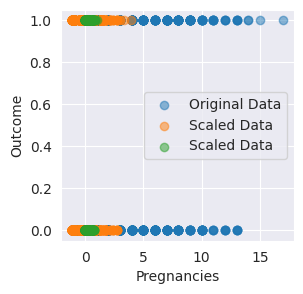

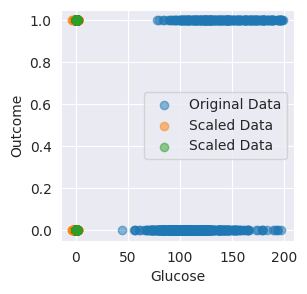

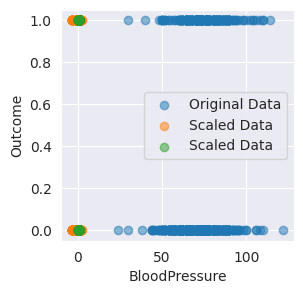

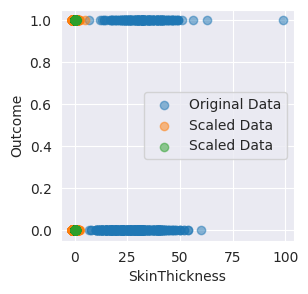

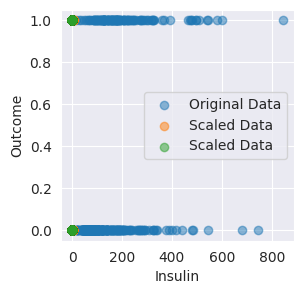

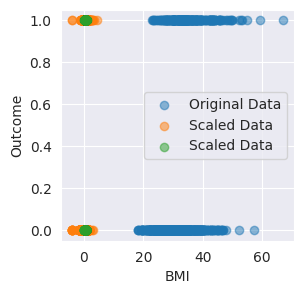

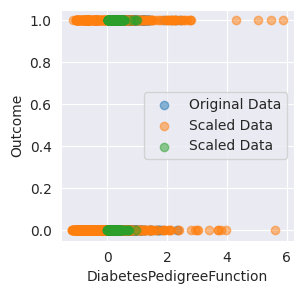

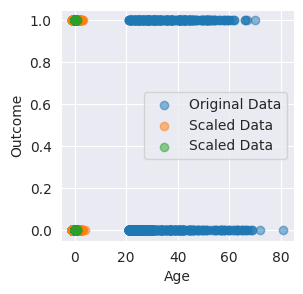

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = diabetes_df_X.select_dtypes(include=[np.number]).columns

# StandardScaler (mean=0, variance=1)
scaler_std = StandardScaler()
diabetes_df_X_scaled = diabetes_df_X.copy()
diabetes_df_X_scaled[num_cols] = scaler_std.fit_transform(diabetes_df_X[num_cols])

# MinMaxScaler (range: 0-1)
scaler_mm = MinMaxScaler()
diabetes_df_X_mm = diabetes_df_X.copy()
diabetes_df_X_mm[num_cols] = scaler_mm.fit_transform(diabetes_df_X[num_cols])

for column in num_cols:
    plt.figure(figsize=(3, 3))
    plt.scatter(diabetes_df[column], diabetes_df["Outcome"], label="Original Data", alpha=0.5)
    plt.scatter(diabetes_df_X_scaled[column], diabetes_df["Outcome"], label="Scaled Data", alpha=0.5)
    plt.scatter(diabetes_df_X_mm[column], diabetes_df["Outcome"], label="Scaled Data", alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Outcome")
    plt.legend()
    plt.show()


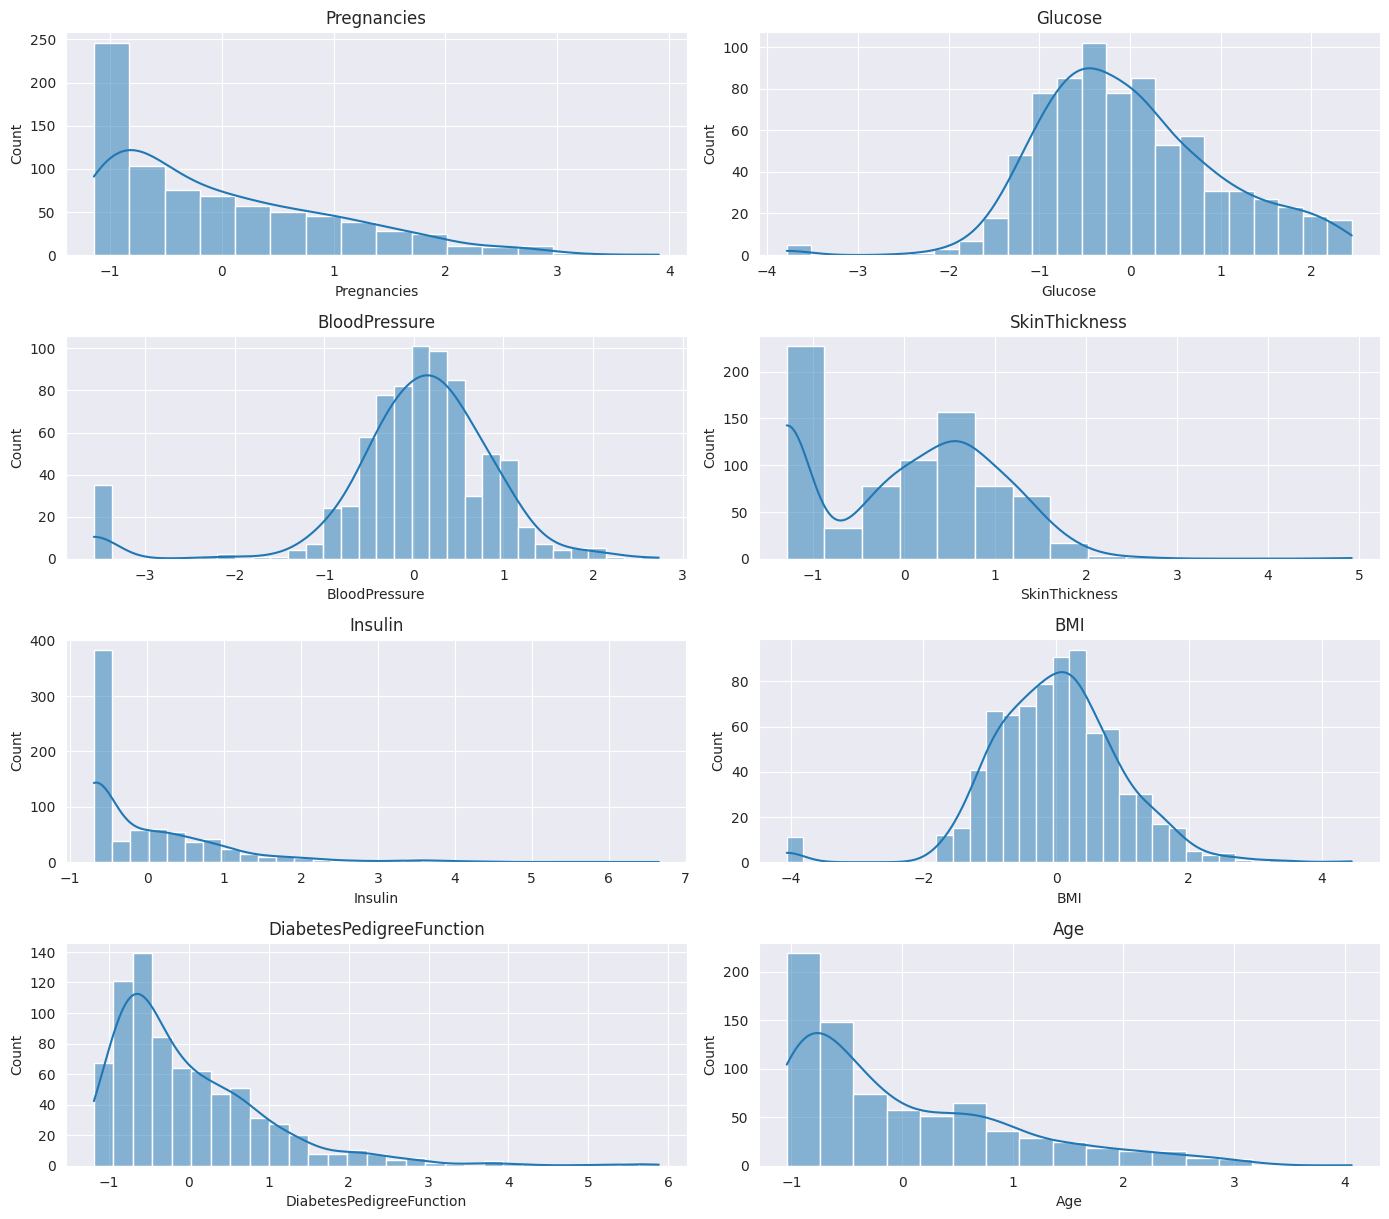

In [ ]:
# After Scaler

sns.set_style("darkgrid")

plt.figure(figsize=(14, len(diabetes_df_X_scaled.columns) * 3))
for idx, feature in enumerate(diabetes_df_X_scaled.columns, 1):
    plt.subplot(len(diabetes_df_X_scaled.columns), 2, idx)
    sns.histplot(diabetes_df_X_scaled[feature], kde=True)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

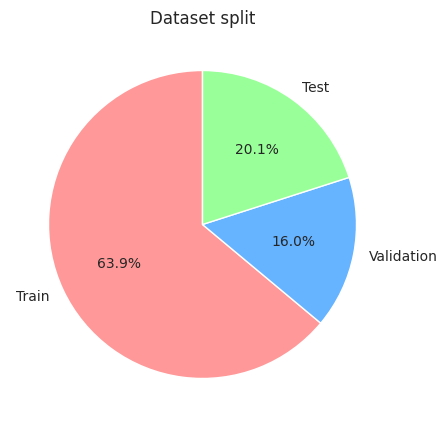

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_df_X_scaled, diabetes_df_y,
                                                    test_size=0.2,
                                                    stratify=diabetes_df_y,
                                                    random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  stratify=y_train,
                                                  random_state=1)

labels = ['Train', 'Validation', 'Test']
sizes = [len(y_train), len(y_val), len(y_test)]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Dataset split')
plt.show()

In [ ]:
# Shape of dataset splits
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (491, 8)
y_train shape: (491,)
X_val shape: (123, 8)
y_val shape: (123,)
X_test shape: (154, 8)
y_test shape: (154,)


# Models definition

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron

from sklearn import metrics

ML_algorithms = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), Perceptron()]

logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
perceptron_model = Perceptron()

ML_models = [logreg_model, knn_model, svm_model, nb_model, dt_model, rf_model, xgb_model, perceptron_model]

# Training

In [ ]:
for model in ML_models:
    model.fit(X_train, y_train)

# Predictions

In [ ]:
for model in ML_models:
    print(model.__class__.__name__ + ' train accuracy: %.3f' % model.score(X_train, y_train))
    print(model.__class__.__name__ + ' validation accuracy: %.3f' % model.score(X_val, y_val))
    print(model.__class__.__name__ + ' test accuracy: %.3f' % model.score(X_test, y_test))
    print()

LogisticRegression train accuracy: 0.800
LogisticRegression validation accuracy: 0.724
LogisticRegression test accuracy: 0.766

KNeighborsClassifier train accuracy: 0.849
KNeighborsClassifier validation accuracy: 0.699
KNeighborsClassifier test accuracy: 0.727

SVC train accuracy: 0.851
SVC validation accuracy: 0.724
SVC test accuracy: 0.734

GaussianNB train accuracy: 0.776
GaussianNB validation accuracy: 0.724
GaussianNB test accuracy: 0.701

DecisionTreeClassifier train accuracy: 1.000
DecisionTreeClassifier validation accuracy: 0.634
DecisionTreeClassifier test accuracy: 0.727

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier validation accuracy: 0.764
RandomForestClassifier test accuracy: 0.740

XGBClassifier train accuracy: 1.000
XGBClassifier validation accuracy: 0.683
XGBClassifier test accuracy: 0.708

Perceptron train accuracy: 0.715
Perceptron validation accuracy: 0.593
Perceptron test accuracy: 0.734



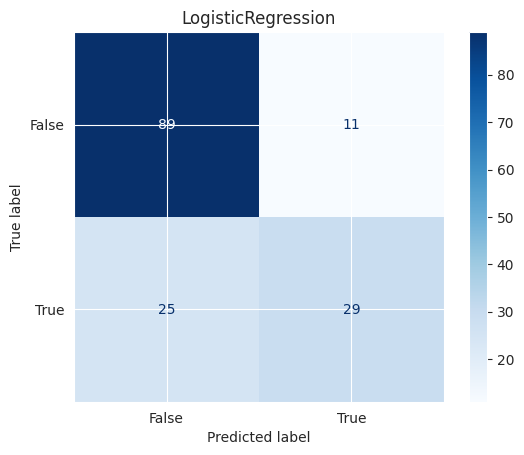

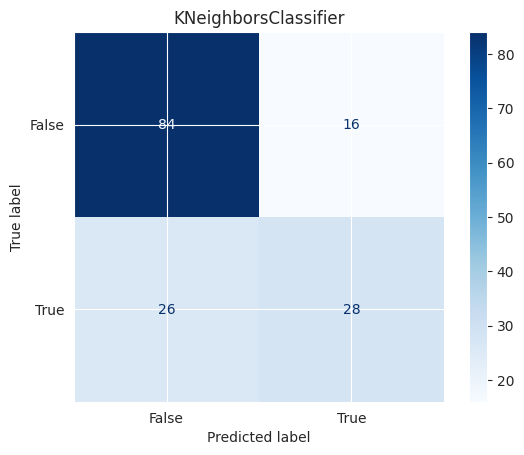

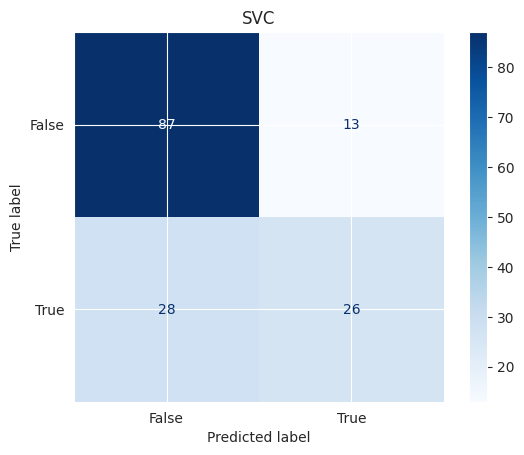

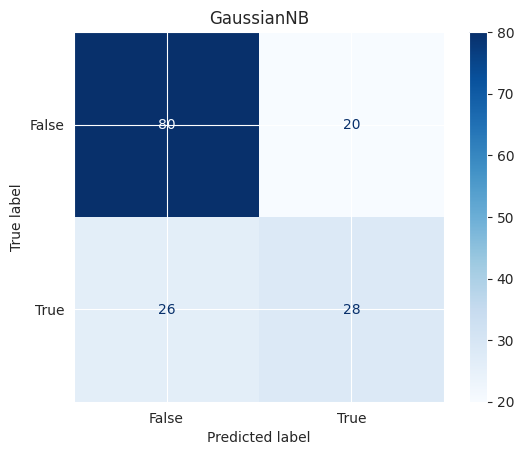

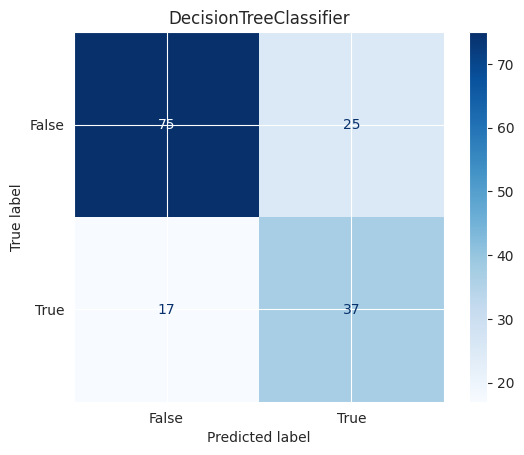

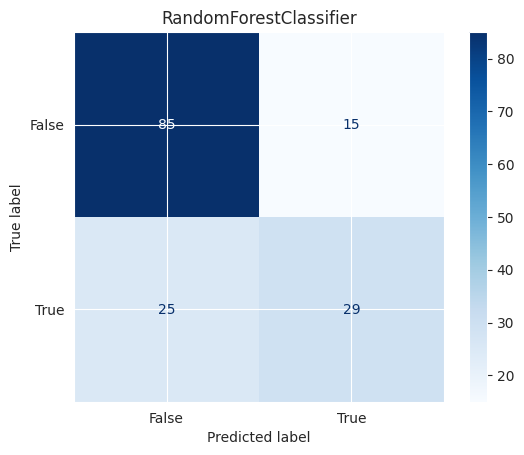

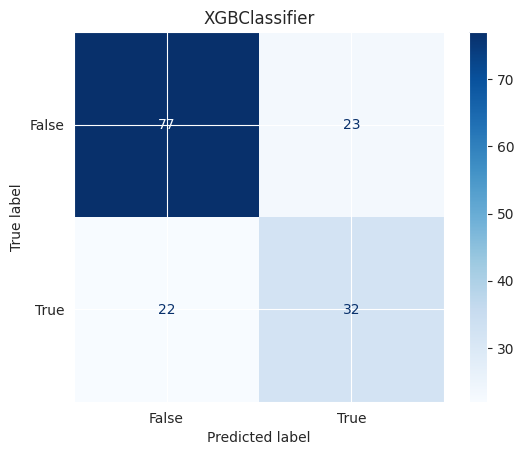

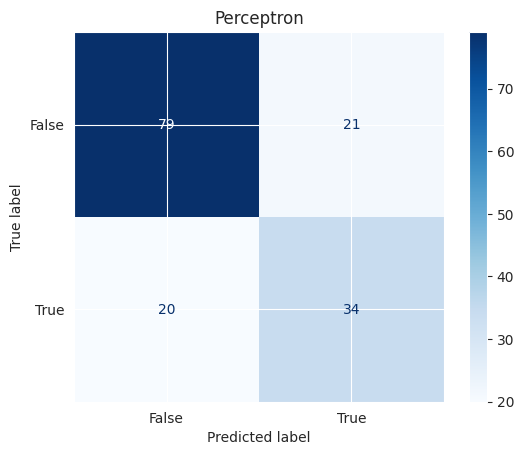

In [ ]:
for model in ML_models:
    y_pred = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot(cmap='Blues', values_format='d')
    plt.title(model.__class__.__name__)
    plt.show()

# Order by test performance

In [ ]:
ordered_models = sorted(ML_models, key=lambda model: model.score(X_test, y_test), reverse=True)

for model in ordered_models:
    print(model.__class__.__name__ + ': %.3f' % model.score(X_test, y_test))

LogisticRegression: 0.766
RandomForestClassifier: 0.740
SVC: 0.734
Perceptron: 0.734
KNeighborsClassifier: 0.727
DecisionTreeClassifier: 0.727
XGBClassifier: 0.708
GaussianNB: 0.701


# Feature Selection

/tmp/ipython-input-3255175550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_df_X_scaled.columns, y=scores, palette='Blues_d', order=diabetes_df_X_scaled.columns[np.argsort(scores)])


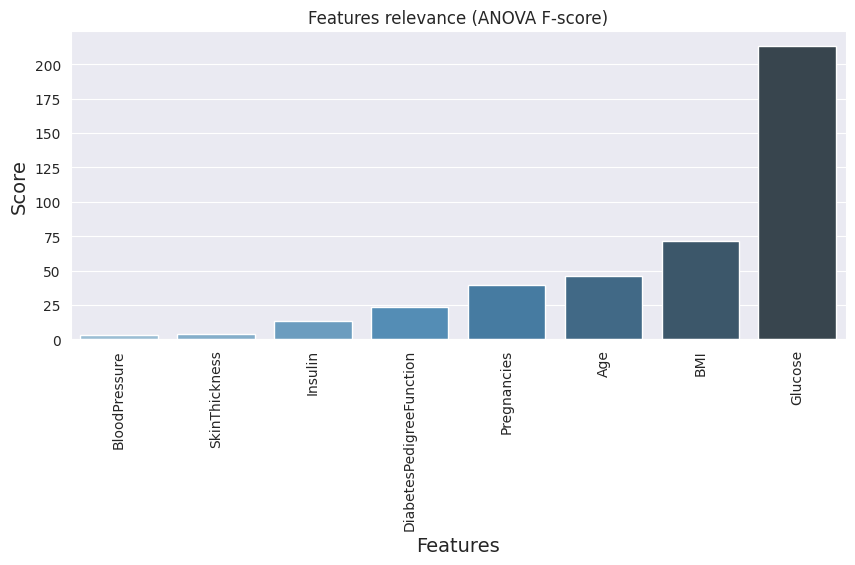

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=3)
selector.fit(diabetes_df_X_scaled, diabetes_df_y)

# Graficar scores
scores = selector.scores_
plt.figure(figsize=(10,4))
sns.barplot(x=diabetes_df_X_scaled.columns, y=scores, palette='Blues_d', order=diabetes_df_X_scaled.columns[np.argsort(scores)])
plt.xlabel('Features', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=90)
plt.title("Features relevance (ANOVA F-score)")
plt.show()

In [ ]:
# Select top 3
diabetes_df_X_top3 = diabetes_df_X_scaled.iloc[:, selector.get_support(indices=True)]

print("Forma original:", diabetes_df_X_scaled.shape)
print("Después de selección:", diabetes_df_X_top3.shape)

Forma original: (768, 8)
Después de selección: (768, 3)


# New split

In [ ]:
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(diabetes_df_X_top3, diabetes_df_y,
                                                    test_size=0.2,
                                                    stratify=diabetes_df_y,
                                                    random_state=1)
X_train_top3, X_val_top3, y_train_top3, y_val_top3 = train_test_split(X_train_top3, y_train_top3,
                                                  test_size=0.2,
                                                  stratify=y_train_top3,
                                                  random_state=1)

print('X_train shape:', X_train_top3.shape)
print('y_train shape:', y_train_top3.shape)
print('X_val shape:', X_val_top3.shape)
print('y_val shape:', y_val_top3.shape)
print('X_test shape:', X_test_top3.shape)
print('y_test shape:', y_test_top3.shape)

X_train shape: (491, 3)
y_train shape: (491,)
X_val shape: (123, 3)
y_val shape: (123,)
X_test shape: (154, 3)
y_test shape: (154,)


# Re-Training

In [ ]:
for model in ML_models:
    model.fit(X_train_top3, y_train_top3)
    print(model.__class__.__name__ + ' train accuracy: %.3f' % model.score(X_train_top3, y_train_top3))
    print(model.__class__.__name__ + ' validation accuracy: %.3f' % model.score(X_val_top3, y_val_top3))
    print(model.__class__.__name__ + ' test accuracy: %.3f' % model.score(X_test_top3, y_test_top3))
    print()

LogisticRegression train accuracy: 0.788
LogisticRegression validation accuracy: 0.715
LogisticRegression test accuracy: 0.753

KNeighborsClassifier train accuracy: 0.804
KNeighborsClassifier validation accuracy: 0.659
KNeighborsClassifier test accuracy: 0.760

SVC train accuracy: 0.796
SVC validation accuracy: 0.707
SVC test accuracy: 0.773

GaussianNB train accuracy: 0.782
GaussianNB validation accuracy: 0.683
GaussianNB test accuracy: 0.721

DecisionTreeClassifier train accuracy: 1.000
DecisionTreeClassifier validation accuracy: 0.626
DecisionTreeClassifier test accuracy: 0.708

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier validation accuracy: 0.699
RandomForestClassifier test accuracy: 0.714

XGBClassifier train accuracy: 0.998
XGBClassifier validation accuracy: 0.675
XGBClassifier test accuracy: 0.701

Perceptron train accuracy: 0.727
Perceptron validation accuracy: 0.659
Perceptron test accuracy: 0.721



# Order by test performance

In [ ]:
ordered_models_top3 = sorted(ML_models, key=lambda model: model.score(X_test_top3, y_test_top3), reverse=True)

for model in ordered_models_top3:
    print(model.__class__.__name__ + ': %.3f' % model.score(X_test_top3, y_test_top3))

SVC: 0.773
KNeighborsClassifier: 0.760
LogisticRegression: 0.753
GaussianNB: 0.721
Perceptron: 0.721
RandomForestClassifier: 0.714
DecisionTreeClassifier: 0.708
XGBClassifier: 0.701


# Feature Extraction

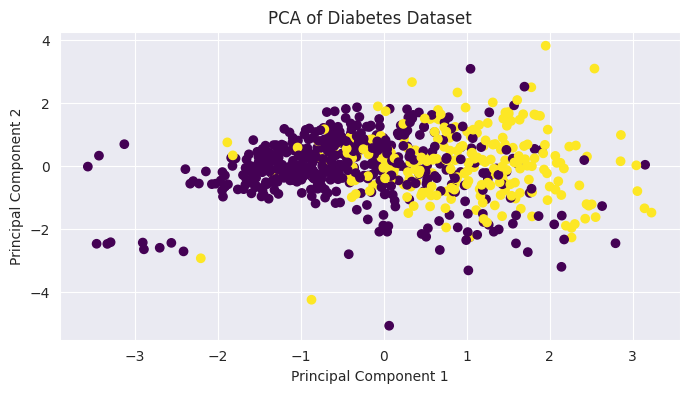

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
diabetes_pca = pca.fit_transform(diabetes_df_X_top3)

plt.figure(figsize=(8, 4))
plt.scatter(diabetes_pca[:, 0], diabetes_pca[:, 1], c=diabetes_df_y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Diabetes Dataset')
plt.show()

# New Split

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(diabetes_pca, diabetes_df_y,
                                                    test_size=0.2,
                                                    stratify=diabetes_df_y,
                                                    random_state=1)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca,
                                                  test_size=0.2,
                                                  stratify=y_train_pca,
                                                  random_state=1)

print('X_train shape:', X_train_pca.shape)
print('y_train shape:', y_train_pca.shape)
print('X_val shape:', X_val_pca.shape)
print('y_val shape:', y_val_pca.shape)
print('X_test shape:', X_test_pca.shape)
print('y_test shape:', y_test_pca.shape)

X_train shape: (491, 2)
y_train shape: (491,)
X_val shape: (123, 2)
y_val shape: (123,)
X_test shape: (154, 2)
y_test shape: (154,)


# Re-Training

In [ ]:
for model in ML_models:
    model.fit(X_train_pca, y_train_pca)
    print(model.__class__.__name__ + ' train accuracy: %.3f' % model.score(X_train_pca, y_train_pca))
    print(model.__class__.__name__ + ' validation accuracy: %.3f' % model.score(X_val_pca, y_val_pca))
    print(model.__class__.__name__ + ' test accuracy: %.3f' % model.score(X_test_pca, y_test_pca))
    print()

LogisticRegression train accuracy: 0.784
LogisticRegression validation accuracy: 0.683
LogisticRegression test accuracy: 0.740

KNeighborsClassifier train accuracy: 0.819
KNeighborsClassifier validation accuracy: 0.724
KNeighborsClassifier test accuracy: 0.708

SVC train accuracy: 0.780
SVC validation accuracy: 0.715
SVC test accuracy: 0.753

GaussianNB train accuracy: 0.784
GaussianNB validation accuracy: 0.699
GaussianNB test accuracy: 0.727

DecisionTreeClassifier train accuracy: 1.000
DecisionTreeClassifier validation accuracy: 0.618
DecisionTreeClassifier test accuracy: 0.675

RandomForestClassifier train accuracy: 1.000
RandomForestClassifier validation accuracy: 0.675
RandomForestClassifier test accuracy: 0.701

XGBClassifier train accuracy: 0.990
XGBClassifier validation accuracy: 0.748
XGBClassifier test accuracy: 0.714

Perceptron train accuracy: 0.774
Perceptron validation accuracy: 0.691
Perceptron test accuracy: 0.747



# Order by test performance

In [ ]:
ordered_models_pca = sorted(ML_models, key=lambda model: model.score(X_test_pca, y_test_pca), reverse=True)

for model in ordered_models_pca:
    print(model.__class__.__name__ + ': %.3f' % model.score(X_test_pca, y_test_pca))

SVC: 0.753
Perceptron: 0.747
LogisticRegression: 0.740
GaussianNB: 0.727
XGBClassifier: 0.714
KNeighborsClassifier: 0.708
RandomForestClassifier: 0.701
DecisionTreeClassifier: 0.675


# Models Points by performance

In [ ]:
Models_points = {'LogisticRegression': 0, 'KNeighborsClassifier': 0, 'SVC': 0, 'GaussianNB': 0, 'DecisionTreeClassifier': 0, 'RandomForestClassifier': 0, 'XGBClassifier': 0, 'Perceptron': 0}

for idx in range(len(ML_models)):
    Models_points[ordered_models[idx].__class__.__name__] += len(ordered_models) - idx
    Models_points[ordered_models_top3[idx].__class__.__name__] += len(ordered_models_top3) - idx
    Models_points[ordered_models_pca[idx].__class__.__name__] += len(ordered_models_pca) - idx

Models_points = dict(sorted(Models_points.items(), key=lambda item: item[1], reverse=True))
Models_points

{'SVC': 22,
 'LogisticRegression': 20,
 'Perceptron': 16,
 'KNeighborsClassifier': 14,
 'RandomForestClassifier': 12,
 'GaussianNB': 11,
 'XGBClassifier': 7,
 'DecisionTreeClassifier': 6}

# Multilayer Perceptron in Keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import keras

In [ ]:
# Hyperparameters
epochs = 50
batch_size = 16
input_dim = 8
learning_rate = 0.01
output_size = 1

In [ ]:
# Sequiential Model
model = Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_top3.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Compile the model
opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',   # Binary Output
             optimizer=opt,
             metrics=['accuracy'])


In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
        monitor = 'val_loss',  # Métrica a monitorear durante el entrenamiento (e.g., validation loss)
        patience = 20,         # Número de épocas sin mejoría después de las cuales se detendrá el entrenamiento
        mode = 'min',          # 'min' para que las métricas se minimicen (como la pérdida), 'max' para que las métricas se maximicen (como la precisión)
        restore_best_weights = True #Restaura los pesos del modelo con el mejor rendimiento
        )

In [ ]:
# Función para guardar el modelo
checkpoint = ModelCheckpoint('diabetes-model.best.h5',  #Guardamos el mejor modelo
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')

# MLP Training

In [ ]:
history = model.fit(X_train_top3, y_train_top3,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_top3, y_val_top3),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.5598

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7171 - loss: 0.5514 - val_accuracy: 0.6911 - val_loss: 0.5581
Epoch 2/50
18/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8174 - loss: 0.4147  

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8037 - loss: 0.4360 - val_accuracy: 0.6829 - val_loss: 0.5780
Epoch 3/50
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.4474

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7963 - loss: 0.4477 - val_accuracy: 0.6911 - val_loss: 0.5887
Epoch 4/50
28/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7832 - loss: 0.5019

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7842 - loss: 0.4962 - val_accuracy: 0.6911 - val_loss: 0.5775
Epoch 5/50
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8166 - loss: 0.4548

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8054 - loss: 0.4566 - val_accuracy: 0.6504 - val_loss: 0.5792
Epoch 6/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.4397

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8246 - loss: 0.4416 - val_accuracy: 0.6992 - val_loss: 0.5766
Epoch 7/50
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 0.4396  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8154 - loss: 0.4396 - val_accuracy: 0.6911 - val_loss: 0.5861
Epoch 8/50
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.4801  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7763 - loss: 0.4733 - val_accuracy: 0.6911 - val_loss: 0.5737
Epoch 9/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.4851 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7742 - loss: 0.4786 - val_accuracy: 0.6911 - val_loss: 0.5987
Epoch 10/50
16/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8388 - loss: 0.4290  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8240 - loss: 0.4290 - val_accuracy: 0.7073 - val_loss: 0.5711
Epoch 11/50
24/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.4843 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7584 - loss: 0.4752 - val_accuracy: 0.6748 - val_loss: 0.6463
Epoch 12/50
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4472  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8121 - loss: 0.4484 - val_accuracy: 0.6829 - val_loss: 0.6056
Epoch 13/50
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4240  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8216 - loss: 0.4276 - val_accuracy: 0.6992 - val_loss: 0.5846
Epoch 14/50
23/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.4394  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7862 - loss: 0.4416 - val_accuracy: 0.7073 - val_loss: 0.5815
Epoch 15/50
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4176  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7994 - loss: 0.4204 - val_accuracy: 0.6992 - val_loss: 0.6122
Epoch 16/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4429  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7854 - loss: 0.4411 - val_accuracy: 0.6911 - val_loss: 0.6100
Epoch 17/50
15/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.4222  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8042 - loss: 0.4296 - val_accuracy: 0.7073 - val_loss: 0.6431
Epoch 18/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7667 - loss: 0.4640 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7707 - loss: 0.4574 - val_accuracy: 0.7073 - val_loss: 0.5959
Epoch 19/50
25/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.3859 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8070 - loss: 0.3945 - val_accuracy: 0.7154 - val_loss: 0.5768
Epoch 20/50
27/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4129  

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8009 - loss: 0.4166 - val_accuracy: 0.7073 - val_loss: 0.5974
Epoch 21/50
26/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.4275 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7880 - loss: 0.4267 - val_accuracy: 0.6667 - val_loss: 0.6278


Visualizando las gráficas del rendimiento del modelo


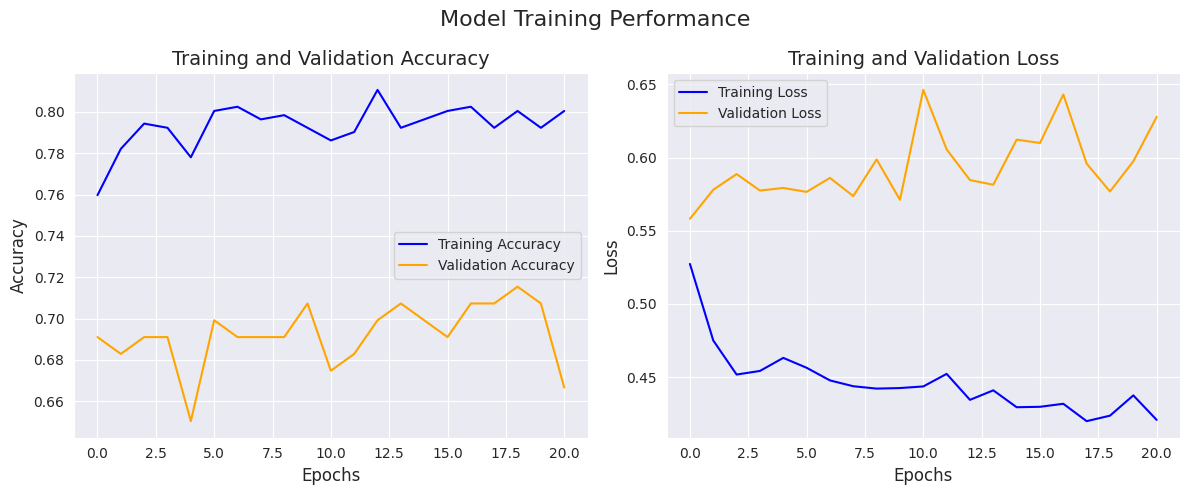

In [ ]:
print("Visualizando las gráficas del rendimiento del modelo")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
print("Evaluación final en el conjunto de prueba")
scores = model.evaluate(X_test_top3, y_test_top3)
print("Test Loss: ", np.round(scores[0], 3))
print("Test Accuracy: ", np.round(scores[1], 3))

Evaluación final en el conjunto de prueba
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7693 - loss: 0.4836 
Test Loss:  0.491
Test Accuracy:  0.747
